In [3]:
# Full code that combines all the above visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
# Load the dataset
df = pd.read_csv('cleaned_us_accident_data.csv')
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7472284 entries, 0 to 7472283
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   source                 object 
 2   severity               int64  
 3   start_time             object 
 4   end_time               object 
 5   start_lat              float64
 6   start_lng              float64
 7   distance(mi)           float64
 8   description            object 
 9   street                 object 
 10  city                   object 
 11  county                 object 
 12  state                  object 
 13  zipcode                object 
 14  timezone               object 
 15  airport_code           object 
 16  weather_timestamp      object 
 17  temperature(f)         float64
 18  wind_chill(f)          float64
 19  humidity(%)            float64
 20  pressure(in)           float64
 21  visibility(mi)         float64
 22  wind_direction    

In [5]:
# Check the column names in the dataset
print(df.columns)


Index(['id', 'source', 'severity', 'start_time', 'end_time', 'start_lat',
       'start_lng', 'distance(mi)', 'description', 'street', 'city', 'county',
       'state', 'zipcode', 'timezone', 'airport_code', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_direction', 'wind_speed(mph)',
       'precipitation(in)', 'weather_condition', 'amenity', 'bump', 'crossing',
       'give_way', 'junction', 'no_exit', 'railway', 'roundabout', 'station',
       'stop', 'traffic_calming', 'traffic_signal', 'turning_loop',
       'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight', 'start_hour', 'start_weekday', 'start_month',
       'start_year', 'duration(min)'],
      dtype='object')


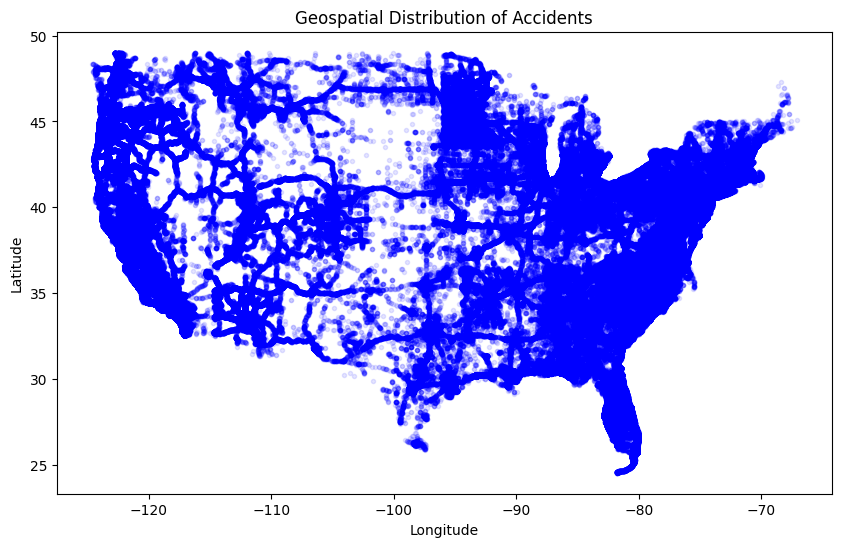

In [6]:
# Visualization 1: Geospatial Distribution of Accidents
plt.figure(figsize=(10, 6))
plt.scatter(df['start_lng'], df['start_lat'], alpha=0.1, c='blue', marker='.')
plt.title('Geospatial Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

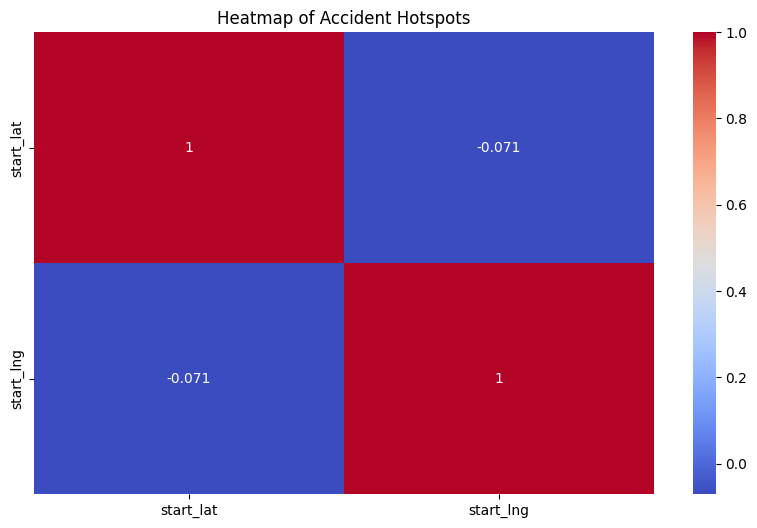

In [7]:
# Visualization 2: Heatmap of Accident Hotspots
plt.figure(figsize=(10, 6))
sns.heatmap(df[['start_lat', 'start_lng']].dropna().corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Accident Hotspots')
plt.show()


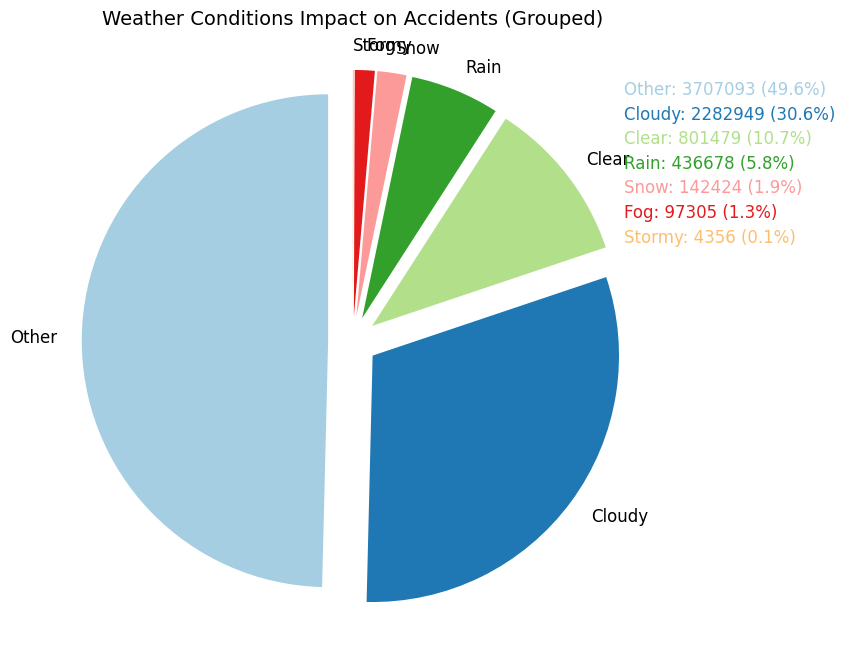

In [28]:
import matplotlib.pyplot as plt

# Create a mapping of original weather conditions to broader categories
weather_mapping = {
    'partly cloudy': 'Cloudy',
    'mostly cloudy': 'Cloudy',
    'scattered clouds': 'Cloudy',
    'overcast': 'Cloudy',
    'clear': 'Clear',
    'fog': 'Fog',
    'light rain': 'Rain',
    'rain': 'Rain',
    'light snow': 'Snow',
    'snow': 'Snow',
    'hail': 'Snow',
    'thunderstorm': 'Stormy',
    'drizzle': 'Rain',
    'dust': 'Other',
    'other': 'Other'
}

# Apply the mapping to create a new column for broader categories
df['weather_condition_combined'] = df['weather_condition'].map(weather_mapping).fillna('Other')

# Count the occurrences of each new combined weather condition
weather_counts_combined = df['weather_condition_combined'].value_counts()

# Create the 'explode' array, where each section of the pie is exploded slightly
explode = [0.1] * len(weather_counts_combined)  # Exploding all sections slightly for a cleaner look

# Create the pie chart
plt.figure(figsize=(10, 8))

# Plot pie chart with the combined categories, but no labels or percentages inside
weather_counts_combined.plot(kind='pie', autopct=None, startangle=90, 
                             explode=explode, textprops={'fontsize': 12},
                             colors=plt.cm.Paired.colors, legend=False)

# Adding a title with increased font size
plt.title('Weather Conditions Impact on Accidents (Grouped)', fontsize=14)

# Remove the default label on the pie chart
plt.ylabel('')

# Display percentages and weather conditions separately outside the pie chart
labels = weather_counts_combined.index
percentages = weather_counts_combined.values

# Position labels and percentages outside the pie chart
for i, label in enumerate(labels):
    plt.text(1.1, 1 - i * 0.1, f'{label}: {percentages[i]} ({(percentages[i] / sum(percentages)) * 100:.1f}%)', 
             fontsize=12, color=plt.cm.Paired.colors[i])

# Show the pie chart
plt.show()


C:\Users\khoba\AppData\Local\Temp\ipykernel_41376\1786780712.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='severity', data=df, palette='Reds', edgecolor='black')


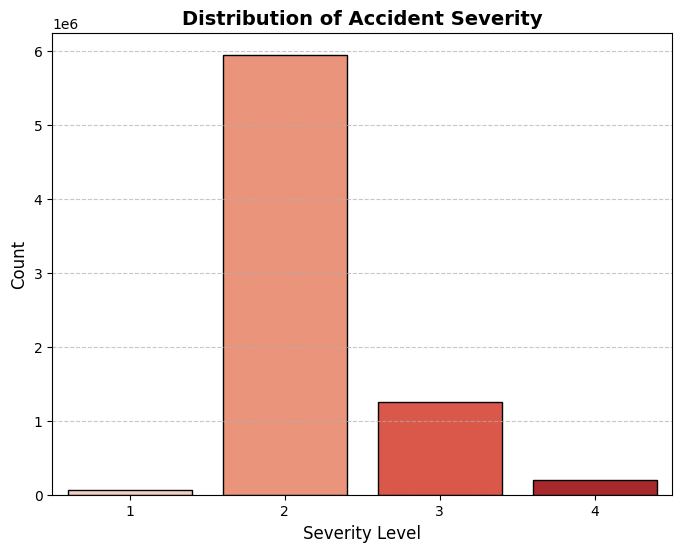

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and 'severity' column is present
# Visualization 3: Distribution of Accident Severity with shades of red
plt.figure(figsize=(8, 6))

# Define a custom color palette ranging from light to dark red
sns.set_palette("Reds")  # Seaborn's "Reds" palette goes from light to dark red

# Creating the countplot with customized red color palette
sns.countplot(x='severity', data=df, palette='Reds', edgecolor='black')

# Adding a title with increased font size and bold text
plt.title('Distribution of Accident Severity', fontsize=14, fontweight='bold')

# Label the x and y axes with adjusted font size
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize x-axis ticks for better presentation
plt.xticks(rotation=0, fontsize=10)

# Display the plot
plt.show()


C:\Users\khoba\AppData\Local\Temp\ipykernel_41376\3800892569.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis', edgecolor='black')


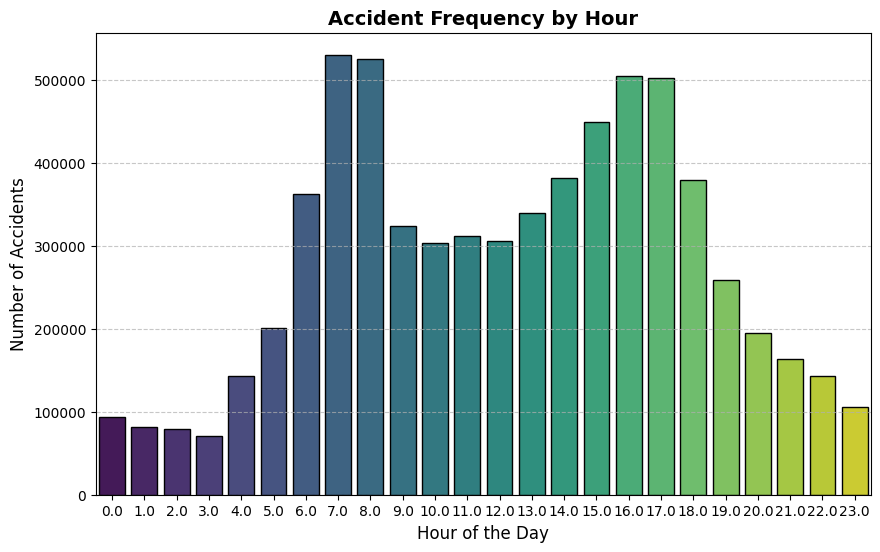

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and the 'Hour' column has been created
# Visualization 4: Hourly Accident Frequency (Accidents by Time of Day)
plt.figure(figsize=(10, 6))

# Use a vibrant color palette from Seaborn
sns.set_palette("viridis")  # You can experiment with other palettes like 'coolwarm', 'Blues', etc.

# Creating the countplot with improved aesthetics
sns.countplot(x='Hour', data=df, palette='viridis', edgecolor='black')

# Adding a title with increased font size and bold text
plt.title('Accident Frequency by Hour', fontsize=14, fontweight='bold')

# Label the x and y axes with adjusted font size
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize x-axis ticks for better presentation (show hours in 12-hour format if preferred)
plt.xticks(rotation=0, fontsize=10)

# Display the plot
plt.show()

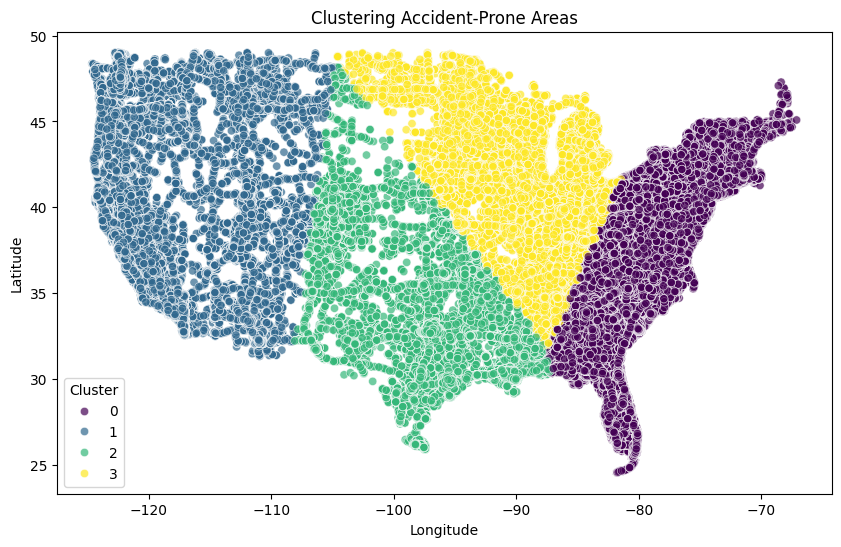

In [11]:
# 5. Clustering Accident-Prone Areas Using KMeans
X = df[['start_lat', 'start_lng']].dropna()

kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='start_lng', y='start_lat', hue='Cluster', data=df, palette='viridis', alpha=0.7)
plt.title('Clustering Accident-Prone Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

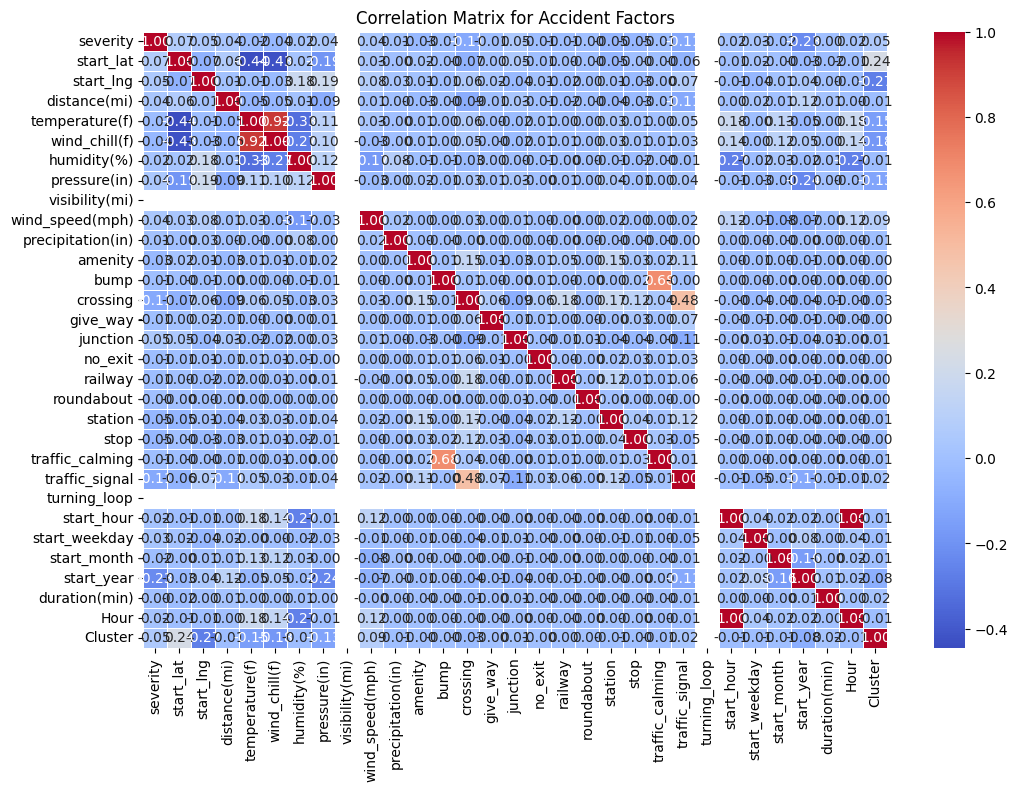

In [12]:
df_numeric = df.select_dtypes(include=[np.number])

df_numeric = df_numeric.fillna(df_numeric.mean())

# calculate the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Accident Factors')
plt.show()

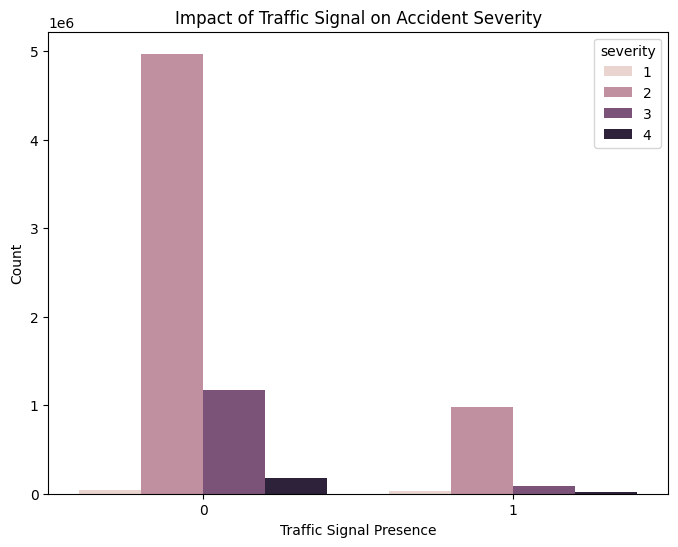

In [13]:
# 7. Traffic Control and Accident Severity
# Analyzing the impact of traffic control features like traffic signals on accident severity
plt.figure(figsize=(8, 6))
sns.countplot(x='traffic_signal', hue='severity', data=df)
plt.title('Impact of Traffic Signal on Accident Severity')
plt.xlabel('Traffic Signal Presence')
plt.ylabel('Count')
plt.show()